The first thing in order is to define the function of the WTD, which for this simple case is:

$$ W(t) = \sum_n n \rho_{nn} e^{-n\gamma t}$$

In [90]:
using LinearAlgebra
using Plots

In [113]:
function wtd(rho, t)
    N = size(rho)[1]
    ns = LinRange(0, N-1, N) 
    probs = diag(rho, 0)
    weights = (probs) .* exp.(-t.*ns)
    sum = dot(weights, ns)
    return real(sum)
end 

wtd (generic function with 1 method)

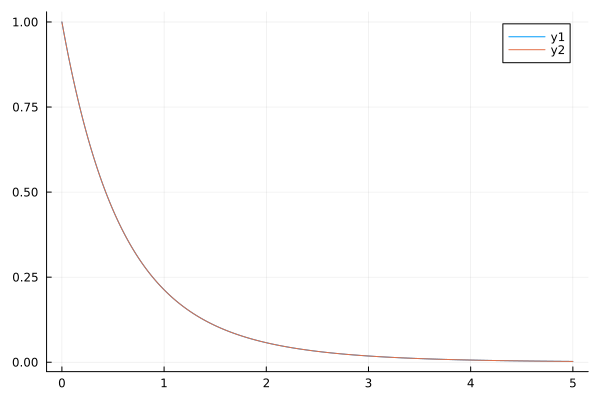

In [147]:
# Testing the WTD implementation
rho_0 = 1/3 .* ones(3,3)
f(t) = wtd(rho_0, t) # Implementation
g(t) = (exp(-t) + 2*exp(-2*t))/3 # Theoretical
t = collect(LinRange(0,5,1000))
y1 = f.(t)
y2 = g.(t)
plot(t, [y1 y2])

Next thing is implementing a sampling routine, I'll go with inversion sampling since for this case it's possible to access 
the CDF:

$$ F(t) = \sum_n \rho_{nn}(1-e^{-n\gamma t})$$

**Remark: if the state contains vacuum componenets the CDF won't go to 1 in** $\gamma t \to \infty$

In [151]:
function cdf(rho, t)
    N = size(rho)[1]
    ns = LinRange(0, N-1, N) 
    probs = diag(rho, 0)
    weights =  (1 .- exp.(-t.*ns))
    sum = dot(weights, probs)
end 

cdf (generic function with 1 method)

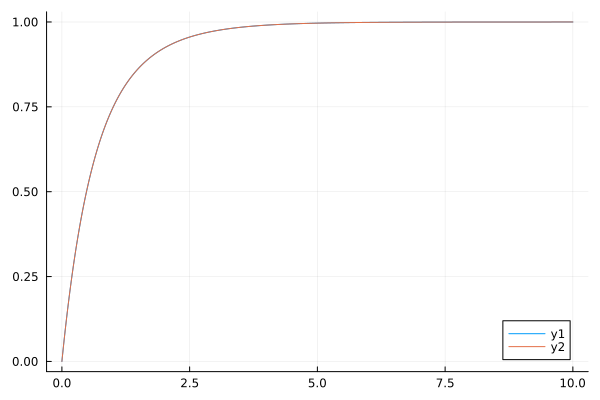

In [164]:
# Testing the CDF implementation
rho_0 = 1/2 .*  [[0, 0, 0] [0, 1, 1] [0, 1, 1] ]
f(t) = cdf(rho_0, t) # Implementation
g(t) = 0.5 * (1-exp(-t)) + 0.5 * (1-exp(-2*t))  # Theoretical
t = collect(LinRange(0,10,1000))
y1 = f.(t)
y2 = g.(t)
plot(t, [y1 y2])

In [ ]:
# sampling routine
function sample(rho)
    
end 